# Denoising Tutorial

## Introduction

This tutorial will show you how to denoise a signal using the `denoise` function from the `denoising` module. We will use two toy examples that have different properties. The benefit using this denoising module is that it can be robust to multiple types of micrcoscopy images.

## Setup

In [1]:
import sys
sys.path.append('../src')  # Add source directory to path

from cellgroup.denoising import (
    analyze_gradients,
    analyze_light_intensity,
    analyze_frequencies,
    analyze_spatial_variations
)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Loading Example Images

In [2]:
IMAGE_C01 = "./toy_data/EXP2111_A06_D#07_T0003_C01.tif"
IMAGE_C13 = "./toy_data/EXP2111_A06_D#19_T0007_C13.tif"

## Example 1: Analyzing Gradients

### Understanding Gradient Analysis Visualizations

#### 1. Contrast Enhanced Image
The first visualization shows our microscopy image after contrast enhancement. This preprocessing step makes the image features more visible by stretching the intensity range. In this enhanced view, cells and cellular structures appear as bright white spots against the darker background. The visible grid pattern represents the well structure of the microscopy plate. This enhancement is crucial because it allows us to see subtle features that might be difficult to distinguish in the raw image.

#### 2. Gradient Magnitude
The second visualization displays the magnitude (strength) of intensity changes at each point in the image. The colormap ranges from purple (low magnitude) to yellow (high magnitude):

- Yellow regions indicate strong intensity changes, typically found at cell edges or sharp transitions
- Purple regions show areas with minimal intensity changes, usually representing uniform backgrounds or cell interiors
- The mean magnitude value (0.182 in this case) gives us a quantitative measure of overall edge strength in the image

This visualization is particularly valuable for:
- Identifying cell boundaries
- Detecting structural features
- Assessing image contrast quality
- Finding regions of significant intensity variation

#### 3. Gradient Direction Distribution
The bottom histogram shows how gradient directions are distributed across the image, ranging from -180° to +180°. This visualization reveals:

- The frequency of different gradient directions in the image
- Regular peaks indicating preferred orientations in the image structure
- Possible systematic patterns or artifacts in the imaging system
- Overall symmetry or asymmetry in the image features

The regular spacing of peaks in this histogram suggests structured patterns in the image, which could correspond to the well grid or systematic cellular arrangements.

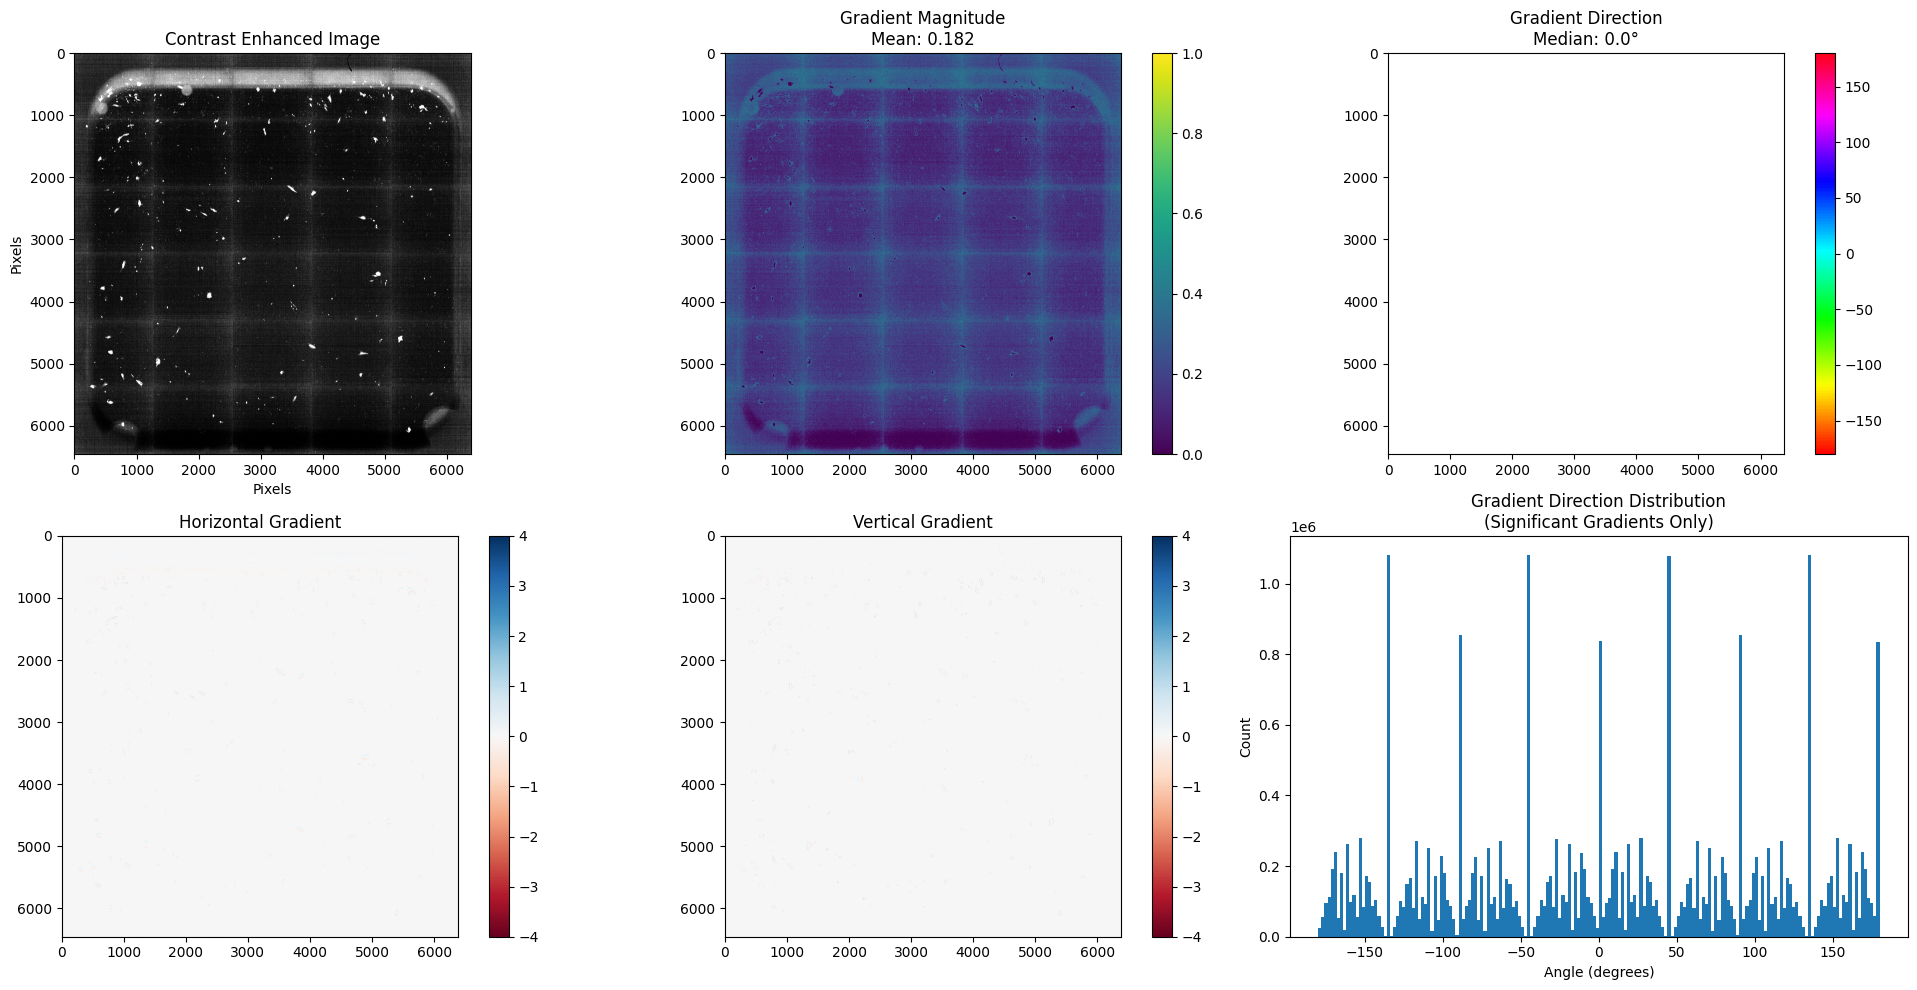

In [3]:
gradient_results_c01 = analyze_gradients(IMAGE_C01)

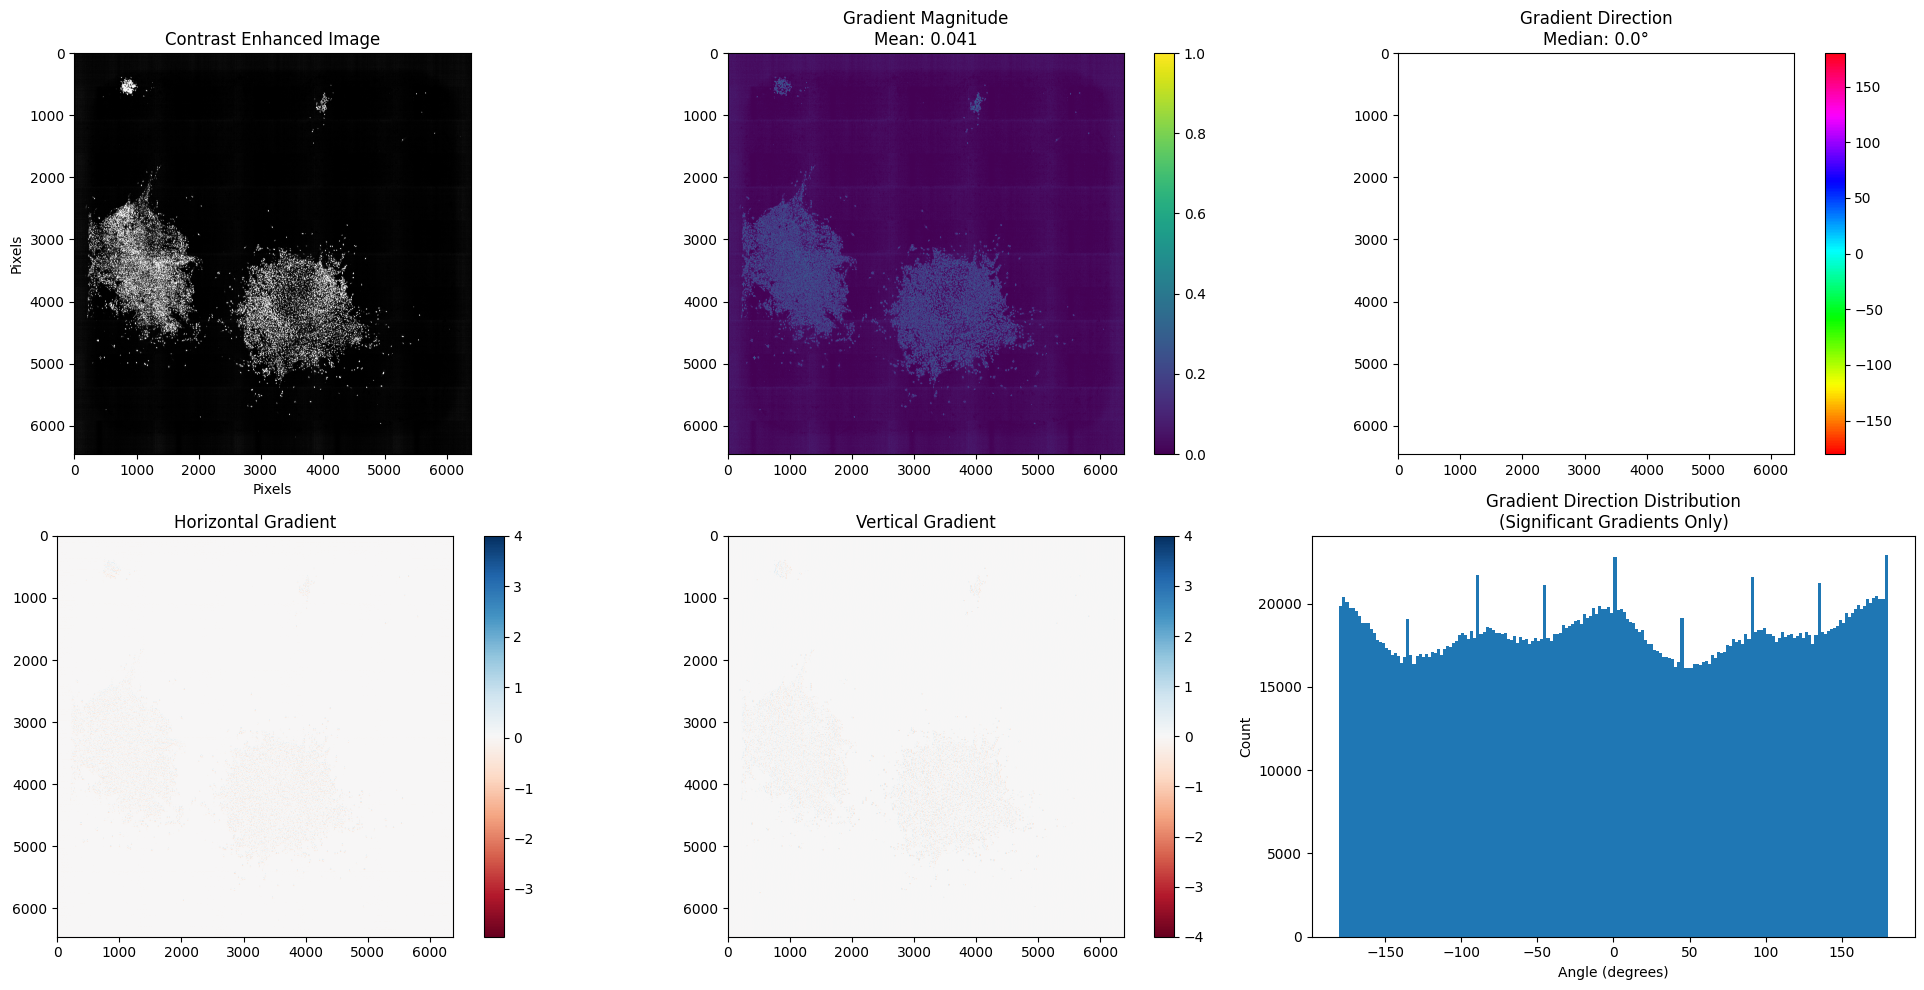

In [4]:
gradient_results_c13 = analyze_gradients(IMAGE_C13)

## Example 2: Analyzing Light Intensity

### Understanding Light Intensity Analysis Visualizations

In [5]:
light_intensity_results_c01 = analyze_light_intensity(IMAGE_C01)

NameError: name 'find_peaks' is not defined